### ML Assignment
Syed Muhammad Abubakar  337385


Asad Ahmed              331881



# Task 1

We are asked to create a multivariate guassian classifier on a given dataset. The data is 4d with three classes and labels provided.


In [ ]:
import scipy.io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal
import pandas as pd


Part 1:

In [ ]:
#import and randomly shuffle the data
data = scipy.io.loadmat('/content/iris_data.mat')
np.random.shuffle(data['iris'])
#seperate labels and the features
x = data['iris'][:,:4]
labels = data['iris'][:,-1]

Part 2 and 3:

In [ ]:
#seperating test and trainign data
tr_data = x[:100,:]
tr_labels = labels[:100]
test_d = x[100:150,:]
test_l = labels [100:150]


Part 4:

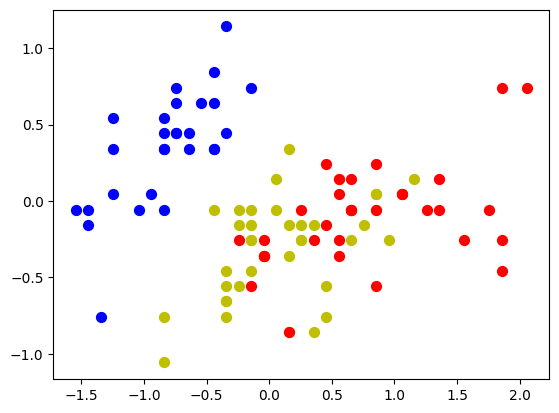

In [ ]:
#Scatter plot first two dimensions of each class
plt.scatter(tr_data[:,0][tr_labels == 1] , tr_data[:,1][tr_labels==1], c = 'b', s=50, label='Class 1')
plt.scatter(tr_data[:,0][tr_labels == 2] , tr_data[:,1][tr_labels==2], c = 'y', s=50, label='Class 2')
plt.scatter(tr_data[:,0][tr_labels == 3] , tr_data[:,1][tr_labels==3], c = 'r', s=50, label='Class 3')

Part 5:

In [ ]:
class_labels = len(np.unique(tr_labels))
input_features = tr_data.shape[1]
m = tr_labels.shape[0]
mu = np.zeros((class_labels, input_features)) #class x features
sigma = np.zeros((class_labels,input_features,input_features))
phi = np.zeros(class_labels)
for label in range(class_labels):
    # Seperate all the training data for a single class
    indices = (tr_labels -1  == label)
    phi[label] = float(np.sum(indices)) / m
    mu[label] = np.mean(tr_data[indices, :], axis=0)
    # Instead of writting the equation we used numpy covariance function.
    sigma[label] = np.cov(tr_data[indices, :], rowvar=0)

test_d = test_d.reshape(test_d.shape[0], -1)

scores = np.zeros((test_d.shape[0], class_labels))  # Initially we set the each class probability to zero.

for label in range(class_labels): # We will calculate the probability for each of the class.
    # normal_distribution_prob.logpdf Will give us the log value of the PDF that we just mentioned above.
    normal_distribution_prob = multivariate_normal(mean=mu[label], cov=sigma[label])
    # x_test can have multiple test data we will calculate the probability of each of the test data
    for i, x_test in enumerate(test_d):
        scores[i, label] = np.log(phi[label]) + normal_distribution_prob.logpdf(x_test)
predictions = np.argmax(scores, axis=1) + 1


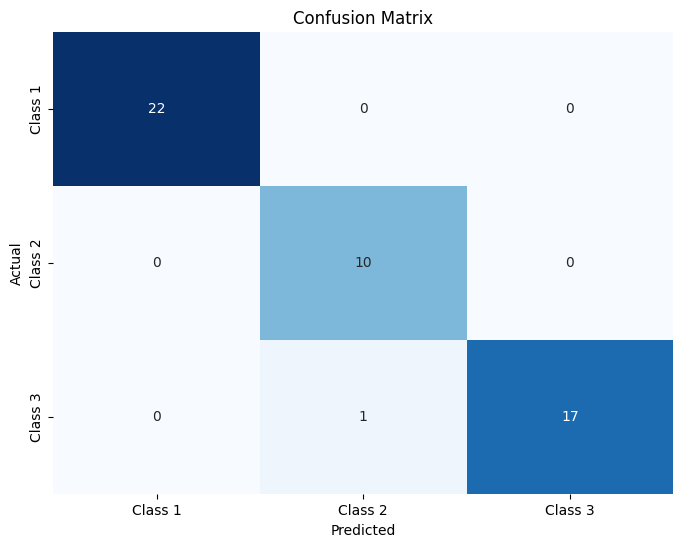

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(test_l, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Part 6: Can you drop any term in the discriminant function? Why?

Ans: If we used the training data as it is for testing, the priors for each class would have been same as each class would have had 50 example. Due to this we could have ignored priors in the discriminant function.
But since we have split our data into training and test portions and have also shuffled it, the balance has been disturbed and we can no longer ignore them

# Task 2

In this task we are asked to design a multivariate linear regression model on 9 dimensional data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Note: .mat file was showing error while using so we are usign the csv file as an alternative. The data is the same.

In [ ]:
df = pd.read_csv("/content/Flu.csv", header=None)

#Reading features
X_data = df.iloc[:, 1:10].to_numpy()
#print(X_data)

#Reading labels
Y_data = df.iloc[:,10].to_numpy()
#print(Y_data)

In [ ]:
#feature scaling
min_max = MinMaxScaler()
X_data_scaled = min_max.fit_transform(X_data)


In [ ]:
def gradient_descent(x, y, alpha, w, b):
    dw = np.zeros(np.shape(w))
    h = b + np.dot(x,w)
    h_2d = h.reshape(1, -1)
    h_t = np.transpose(h_2d)
    for j in range (0,9):
        dw[j] = (1/(len(y))) * np.sum((h_t - y)*x[:,j])
    db = (1/(len(y))) * np.sum(h_t - y)
    w_new = w - alpha*dw
    b_new = b - alpha*db
    return w_new, b_new

alpha = 0.00001

total_epochs = 1000
w = np.random.rand(9)
b = 0.5

for j in range(0,total_epochs):
    [w,b] = gradient_descent(X_data_scaled, Y_data, alpha, w, b)

g = b + np.dot(X_data_scaled,w)
g = g.reshape(-1,1)
print("Dimensions of g(x|w): ",g.shape)


Dimensions of g(x|w):  (52, 1)


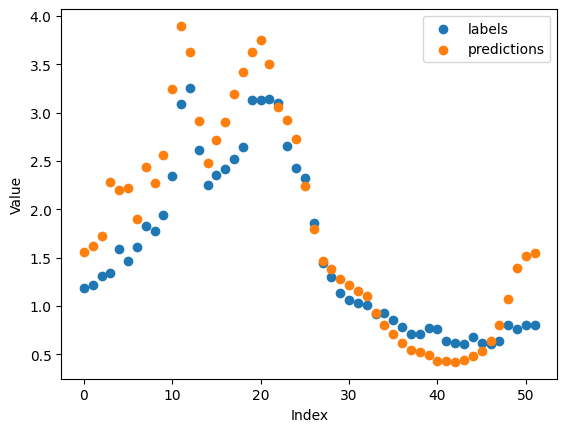

In [ ]:
#plots
plt.scatter(range(0,52),Y_data, label="labels")
plt.scatter(range(0,52),g, label="predictions")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()